In [1]:
import pandas as pd

In [3]:
data=pd.read_csv('/content/Salary Data.csv')

In [5]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
data.isna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
370,False,False,False,False,False,False
371,False,False,False,False,False,False
372,False,False,False,False,False,False
373,False,False,False,False,False,False


In [6]:
data.isna().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [7]:
data = data.dropna()

In [8]:
data.isna().sum()

,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


In [9]:
print(data['Gender'].value_counts())

Gender
Male      194
Female    179
Name: count, dtype: int64


In [10]:
print(data['Education Level'].value_counts())

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64


In [11]:
print(data['Job Title'].value_counts())

Job Title
Director of Marketing             12
Director of Operations            11
Senior Business Analyst           10
Senior Marketing Manager           9
Senior Marketing Analyst           9
                                  ..
Junior Social Media Specialist     1
Junior Operations Coordinator      1
Senior HR Specialist               1
Director of HR                     1
Junior Financial Advisor           1
Name: count, Length: 174, dtype: int64


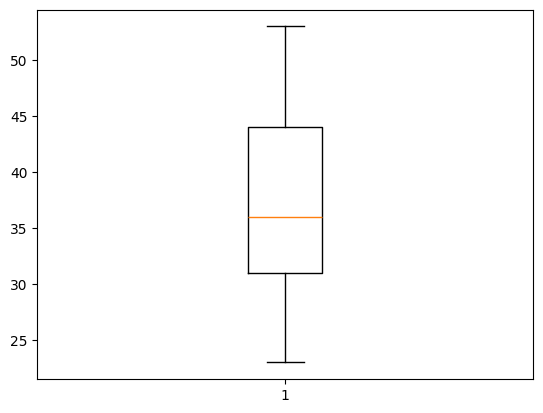

In [12]:
import matplotlib.pyplot as plt
plt.boxplot(data['Age'])
plt.show()

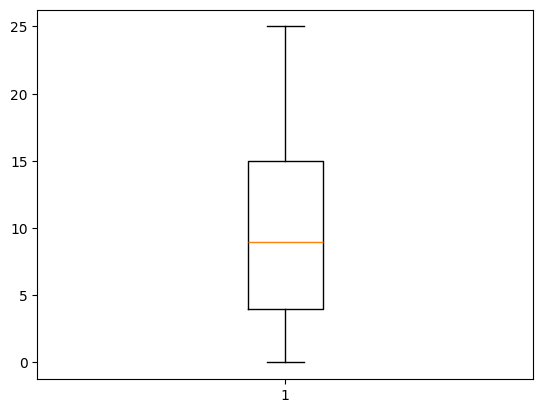

In [13]:
plt.boxplot(data['Years of Experience'])
plt.show()

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
import joblib
import os


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Education Level'] = encoder.fit_transform(data['Education Level'])
data['Job Title'] = encoder.fit_transform(data['Job Title'])

X = data.drop("Salary", axis=1)
y = data["Salary"]


num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}


best_model = None
best_model_name = ""
best_score = -1

print("\nModel Evaluation Metrics:\n" + "-"*60)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"{name}")
    print(f"   ✅ R² Score     : {r2:.4f}")
    print(f"   📉 MAE (Error)  : {mae:.4f}")
    print(f"   🧮 MSE (Error²) : {mse:.4f}\n")

    if r2 > best_score:
        best_score = r2
        best_model = model
        best_model_name = name

os.makedirs("saved_model", exist_ok=True)
model_path = f"saved_model/{best_model_name.replace(' ', '_').lower()}_model.pkl"
joblib.dump(best_model, model_path)
joblib.dump(scaler, "saved_model/scaler.pkl")

print(f"\n✅ Best model saved: {best_model_name}")
print(f"📦 Model Path: {model_path}")
print(f"📈 Best R² Score: {best_score:.4f}")
print("✅ Scaler saved in 'saved_model/' directory.")



Model Evaluation Metrics:
------------------------------------------------------------
Linear Regression
   ✅ R² Score     : 0.8961
   📉 MAE (Error)  : 10928.9215
   🧮 MSE (Error²) : 249075656.4272

Random Forest
   ✅ R² Score     : 0.9401
   📉 MAE (Error)  : 8529.4577
   🧮 MSE (Error²) : 143665122.0897

XGBoost
   ✅ R² Score     : 0.9248
   📉 MAE (Error)  : 8877.5603
   🧮 MSE (Error²) : 180234432.6908

Extra Trees
   ✅ R² Score     : 0.9102
   📉 MAE (Error)  : 8058.6667
   🧮 MSE (Error²) : 215188733.3333

Gradient Boosting
   ✅ R² Score     : 0.9269
   📉 MAE (Error)  : 8933.1654
   🧮 MSE (Error²) : 175339697.5722


✅ Best model saved: Random Forest
📦 Model Path: saved_model/random_forest_model.pkl
📈 Best R² Score: 0.9401
✅ Scaler saved in 'saved_model/' directory.


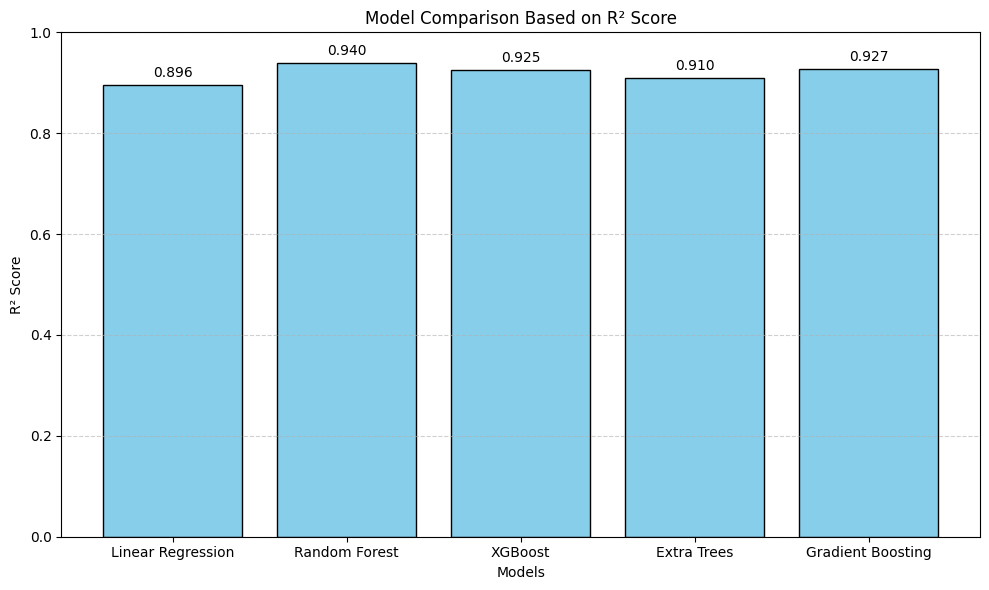

In [15]:
model_names = []
r2_scores = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    model_names.append(name)
    r2_scores.append(r2)

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, r2_scores, color='skyblue', edgecolor='black')
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Model Comparison Based on R² Score")
plt.ylim(0, 1)


for bar, score in zip(bars, r2_scores):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{score:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()
